In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

parms = {}

# store all data here
class atomXsFs:
    def __init__(self,numAtoms,numTurns):
        # for each atom, at every turn, we have xpos, ypos, zpos, xforce, yforce, zforce data points (6 data points)
        self.dat = np.zeros((numAtoms, numTurns, 6))
        
    def addData(self,atomID,turn, xpos, ypos, zpos, xforce, yforce, zforce):
        self.dat[atomID,turn,0:] = xpos,ypos,zpos,xforce,yforce,zforce
        # add the data to the given array

iline = 0
thisFile = open("resultsLJ.txt", "r")

# open the file and assign relevant parameters
print "loading parameters"
for line in thisFile:
    iline +=1
    thisLine = line.split()
    if thisLine[0] == "REMARK":
        parms[str(thisLine[1])]= str(thisLine[2])
    
    # and now we are done reading remarks
    if thisLine[0] != "REMARK":
        break
        
print "parameters loaded"
# return to beginning of file
            
print "loading atom coords and forces"

# instantiate the class
print parms
nAtoms = int(parms['maxAtomID']) - int(parms['minAtomID']) + 1

myAtoms = atomXsFs(nAtoms,int(parms['nTurns']))

# this does not assume that atoms are written in any particular order; it assumes 
# that they are completely out of order 

for i in range(int(nAtoms)):
    turn = 0
    thisFile.seek(0,0)
    for line in thisFile:
        thisLine = line.split()
        if thisLine[0] == "REMARK":
            continue
        elif thisLine[0] == "Turn":
            # check if we are done
            if str(thisLine[1]) == str(parms['nTurns']):
                continue
            else:
                continue
        elif (str(thisLine[0])==str(i)):
            thisAtom = int(i)
            posx = float(thisLine[1])
            posy = float(thisLine[2])
            posz = float(thisLine[3])
            forcex = float(thisLine[4])
            forcey = float(thisLine[5])
            forcez = float(thisLine[6])
            myAtoms.addData(thisAtom, turn, posx, posy, posz, forcex, forcey, forcez)
            turn +=1                
        else:
            continue

thisFile.close()
print "atom coords and forces loaded"



loading parameters
parameters loaded
loading atom coords and forces
{'minAtomID': '0', 'maxAtomID': '0', 'cutoff': '15', 'epsilon': '1.0', 'nTurns': '7000', 'boxlength': '35', 'FixWallType': 'LJ126', 'sigma': '2.4'}
atom coords and forces loaded


In [3]:
# accesses atom 1's data for turn 10,000 (which is stored in index 9999, or -1)
print myAtoms.dat[0,-1,:]
# use to verify beginning & end data is correct (==> everything in between is okay too, then (presumably))

[  2.28976670e+01   1.00000000e+01   1.00000000e+01   1.21000000e-04
   0.00000000e+00   0.00000000e+00]


# Considerations for future:
## - implement a distance function, compute distances from wall, store these distances rather than the coordinates
## - import data regarding the wall plane rather than having it only in the input file (makes this validation more self-contained)

2.4 sigma value
1.0 epsilon value
15.0 cutoff distance
0  :  0.0   16.0   0.0
1  :  0.0   16.01   0.0
2  :  0.0   16.02   0.0
3  :  0.0   16.030001   0.0
4  :  0.0   16.040001   0.0
5  :  0.0   16.050001   0.0
6  :  0.0   16.060001   0.0
7  :  0.0   16.070002   0.0
8  :  0.0   16.080002   0.0
9  :  0.0   16.090002   0.0
10  :  0.0   16.100002   0.0
11  :  0.0   16.110003   0.0
12  :  0.0   16.120003   0.0
13  :  0.0   16.130003   0.0
14  :  0.0   16.140003   0.0
15  :  0.0   16.150003   0.0
16  :  0.0   16.160004   0.0
17  :  0.0   16.170004   0.0
18  :  0.0   16.180004   0.0
19  :  0.0   16.190004   0.0
20  :  0.0   16.200005   0.0
21  :  0.0   16.210005   0.0
22  :  0.0   16.220005   0.0
23  :  0.0   16.230005   0.0
24  :  0.0   16.240005   0.0
25  :  0.0   16.250006   0.0
26  :  0.0   16.260006   0.0
27  :  0.0   16.270006   0.0
28  :  0.0   16.280006   0.0
29  :  0.0   16.290007   0.0
30  :  0.0   16.300007   0.0
31  :  0.0   16.310007   0.0
32  :  0.0   16.320007   0.0
33  :  0.0 

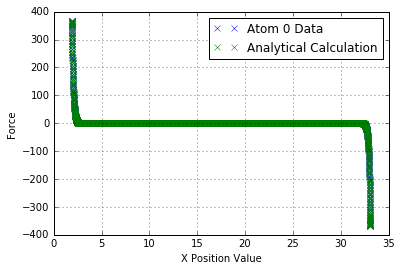

In [50]:
# graph the points
# np is zero 

#initialize a counter for figures

# at the moment, it suffices to plot the particle distance as the xposition, since the wall is the yz-plane at x=0
# but also at x=35, for this test; since the cutoff distance is 28 for each, there should be a 4-unit 'dead-zone'

numFigs = 1
# analytical force function LJ: 

# distance is an array of floats, len(distance) = int(parms['nTurns']), in this case 7000

# some index shifting is handled here since the data is printed from the preForce subroutine;
# this means that the force and the position are offset by one (at the chosen print location within md_engine)
# and so to line it up correctly with the analytical results computed AT the position, we shift the indices by 1
def forceLJ_trim(distance):
    ljForce = np.zeros(len(distance)+1)
    eps = float(parms['epsilon'])
    sigma = float(parms['sigma'])
    sigma6 = sigma**6
    sigma12 = sigma**12
    
    dataCopy = np.zeros(len(distance))
    for index, item in enumerate(distance):
        dataCopy[index] = item
    

    invDist = np.zeros(len(distance)+1)
    invDist6 = np.zeros(len(distance)+1)
    
    for index, item in enumerate(distance):
        newItem = item
        dataCopy[index] = min(float(newItem), abs(float(parms['boxlength']) - float(newItem)))
        
    for index, item in enumerate(dataCopy):
        if item > 0.0:
            invDist[index] = 1./float(item)
            invDist6[index] = invDist[index] ** 6
        
    for index, item in enumerate(dataCopy):
        # determine whether the particle is interacting with the wall at (0,0,0) or (35,0,0) - the walls act in 
        # opposite directions, but with the same sigma and epsilon parameters.
        actualIdx = index + 1
        # also, if within the deadzone, then ljForce[index] = 0.0
        
        if (float(parms['cutoff']) <= item):
            ljForce[actualIdx] = 0.0
            
        elif (float(parms['cutoff']) <= float(distance[index])):
            # then the particle *may* be interacting with the opposite wall! check if the updated dataCopy[index]
            # is within the cutoff; else, it is in the dead-zone
            ljForce[actualIdx] = -invDist6[index] * invDist[index] * 24.0 * eps * (2*sigma12*invDist6[index] - sigma6)

        else:
            # note that this differs from the derivative of the LJ potential by a factor of -1;
            # this is because the directionality of the force is encoded in a vector 'forceDir' in md_engine
            
            ljForce[actualIdx] = invDist6[index] * invDist[index] * 24.0 * eps * (2*sigma12*invDist6[index] - sigma6)
            
    # trim the last index; we ahve effectively shifted
    thisForce = ljForce[0:-1]
    return thisForce


print float(parms['sigma']), "sigma value"
print float(parms['epsilon']), "epsilon value"
print float(parms['cutoff']), "cutoff distance"

for atom in range(nAtoms):
    plt.figure(numFigs)
    xvals = myAtoms.dat[atom,1:,0]
    yvals = myAtoms.dat[atom,1:,3]
    yvals_LJ = forceLJ_trim(xvals)
    plt.plot(xvals,yvals,'x', xvals, yvals_LJ,'x')
    plt.legend(['Atom %d Data' %atom, 'Analytical Calculation'], loc='best')
    plt.xlabel('X Position Value')
    plt.ylabel('Force')
    plt.grid()
    numFigs = numFigs + 1
    
thisDatLJ = forceLJ_trim(myAtoms.dat[0,1:,0])
for i in range(int(parms['nTurns'])-1):
    print i, " : ", thisDatLJ[i], " ", myAtoms.dat[0,i,0], " ", myAtoms.dat[0,i,3]

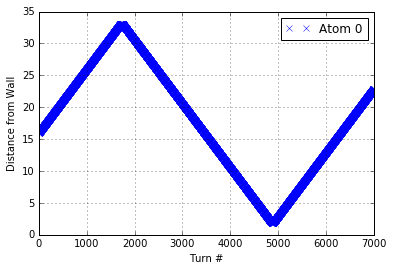

In [54]:
# examine the xpos data as a function of the number of turns
nTurnsMin1 = int(parms['nTurns']) - 1
for atom in range(nAtoms):
    plt.figure(numFigs)
    xvals = range(0,nTurnsMin1)
    yvals = myAtoms.dat[atom,:nTurnsMin1,0]
    plt.plot(xvals,yvals,'x')
    plt.legend(['Atom %d' %atom],loc='best')
    plt.xlabel('Turn #')
    plt.ylabel('Distance from Wall')
    plt.grid()
    numFigs = numFigs + 1

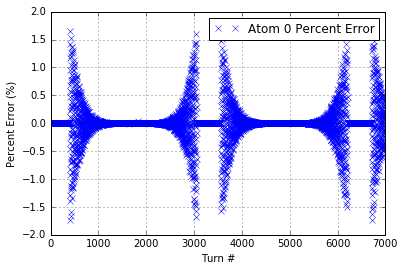

In [59]:
## more importantly, look at the deviations of wall fix vs analytical results

## after looking at the data, we can see that actual comparison should shift the computed analytical 
# values by 1 index to match up with simulation results.  this is because the data is coming from the 
# preForce subroutine in md_engine; offset by 1 in the position
# this index shift is taken care of in the computation of the analytical force as a function of distance above
# denoted by def ljForce

# this isn't

def percentError(simulated,analytical):
    percentError_ = np.zeros(len(simulated))
    for index, item in enumerate(simulated):
        # let's ignore the error when the magnitude of the force is less than 1e-4 (note that this 
        # a force of 1e-4 on a timestep of 1e-3 –– 
        if abs(analytical[index]) > 0.0:
            percentError_[index] = (simulated[index]-analytical[index])/analytical[index] * 100
        #if abs(percentError_[index]) > 1.0:
        #    print "Percent error of ", percentError_[index], " at index ", index,  simulated[index], analytical[index]
    return percentError_

for atom in range(nAtoms):
    plt.figure(numFigs)
    xvals = range(nTurnsMin1)
    #print len(xvals), " len xvals "
    yvals = myAtoms.dat[atom,:nTurnsMin1,3]
    #print len(yvals), " len yvals " 
    distFromWall = myAtoms.dat[atom,:nTurnsMin1,0]
    #print len(distFromWall), " len distFromWall " 
    yvals_LJ = thisDatLJ
    #print len(yvals_LJ), " len yvals_LJ "
    yvals_Error = percentError(yvals,yvals_LJ)
    plt.plot(xvals,yvals_Error,'x')
    plt.legend(['Atom %d Percent Error' %atom], loc='upper right')
    plt.xlabel('Turn #')
    plt.ylabel('Percent Error (%)')
    plt.grid()
    numFigs = numFigs + 1
    



# Re: The strange error graph above
The larger errors (by percent) occur when the force is approximately 1e-5; we can see that large errors by percent (~turn 400, 3000, 3500, 6100, and 6700) occur here; however, a plot of the residuals squared may be more revealing:


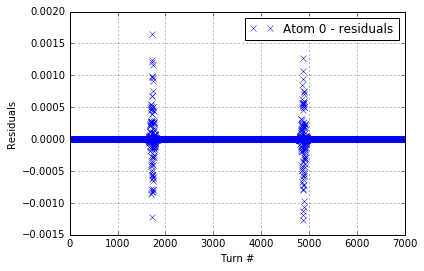

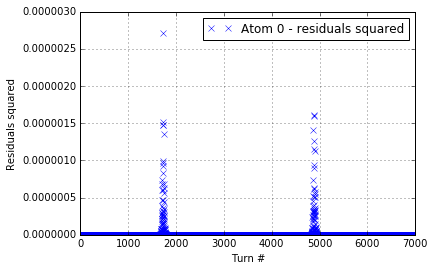

In [68]:
for atom in range(nAtoms):
    plt.figure(numFigs)
    xvals = range(nTurnsMin1)
    yvals = myAtoms.dat[atom,:nTurnsMin1,3]
    distFromWall = myAtoms.dat[atom,:nTurnsMin1,0]
    yvals_LJ = thisDatLJ
    yvals_residsq = yvals_LJ - yvals
    
    # for completeness, let's also plot the residuals
    yvals_resid = yvals_residsq
    yvals_residsq = yvals_resid ** 2.0
    #copy_yvals_resid = yvals_residsq
    #for index, item in enumerate(copy_yvals_resid):
    #    newItem = item ** 2.   
    #    yvals_residsq[index] = newItem

    plt.plot(xvals,yvals_resid,'x')
    plt.legend(['Atom %d - residuals' %atom], loc='upper right')
    plt.xlabel('Turn #')
    plt.ylabel('Residuals')
    plt.grid()
    numFigs = numFigs+1

            
    plt.figure(numFigs)
    plt.plot(xvals,yvals_residsq,'x')
    plt.legend(['Atom %d - residuals squared' %atom], loc='upper right')
    plt.xlabel('Turn #')
    plt.ylabel('Residuals squared')
    plt.grid()
    numFigs = numFigs+1